# Question 5

In [186]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

### Loading Data

In [187]:
df_2017 = pd.read_csv("nba2017.csv")
df_2016 = pd.read_csv("nba2016.csv")
df_2015 = pd.read_csv("nba2015.csv")
df_2014 = pd.read_csv("nba2014.csv")
df_2013 = pd.read_csv("nba2013.csv")
df_2012 = pd.read_csv("nba2012.csv")
df_2011 = pd.read_csv("nba2011.csv")
df_2010 = pd.read_csv("nba2010.csv")

In [188]:
df2017 = df_2017[['FG%', 'ORB', 'DRB', 'TRB', 'PTS']]
df2016 = df_2016[['FG%', 'ORB', 'DRB', 'TRB', 'PTS']]
df2015 = df_2015[['FG%', 'ORB', 'DRB', 'TRB', 'PTS']]
df2014 = df_2014[['FG%', 'ORB', 'DRB', 'TRB', 'PTS']]
df2013 = df_2013[['FG%', 'ORB', 'DRB', 'TRB', 'PTS']]
df2012 = df_2012[['FG%', 'ORB', 'DRB', 'TRB', 'PTS']]
df2011 = df_2011[['FG%', 'ORB', 'DRB', 'TRB', 'PTS']]
df2010 = df_2010[['FG%', 'ORB', 'DRB', 'TRB', 'PTS']]

### MultipleLinearRegression function which return the weight vector $\hat{\beta}$

In [189]:
def MultipleLinearRegression(X,Y):
#     print("X.shape, Y.shape",(X.shape, Y.shape))
    temp1 = X.T.dot(X)
    temp2 = X.T.dot(Y)
    temp1 = np.linalg.inv(temp1)
#     print("temp1.shape, temp2.shape",(temp1.shape, temp2.shape))
    beta_hat = temp1.dot(temp2)
#     print("beta_hat.shape",beta_hat.shape)
    return(beta_hat)

### Part (a) Using 2016 data (change year to 2016 in url) as training, find the multiple linear regression fit for PTS as a function of only FG% and TRB (no $\beta_0$). Treat each row as a new observation. What can you infer about the contribution of TRB to total points?

In [190]:
x_train = np.array(df2016[['FG%', 'TRB']])
y_train = np.array(df2016[['PTS']])
beta_hat = MultipleLinearRegression(x_train, y_train)
print('beta_hat:',beta_hat)

# linreg = LinearRegression()
# model = linreg.fit(x_train, y_train)
# pred = x_train.dot(beta_hat)

beta_hat: [[129.63595432]
 [  1.00665119]]


### INFERENCE: Weight of TRB feature is less compared to that of PTS. So, TRB Contributes less (1.0066) to PTS as compared to FG% (129.63)

### Part (b) Repeat part (a) but now also include ORB and DRB as predictors. What can you infer about the contribution of TRB to total points in this case? Explain, in words, why this happens. This is a result of Multicollinearity.

In [216]:
x_train = np.array(df2016[['FG%', 'TRB', 'ORB', 'DRB']])
y_train = np.array(df2016[['PTS']])
# linreg = LinearRegression()
# model = linreg.fit(x_train, y_train)
beta_hat = MultipleLinearRegression(x_train, y_train)
print('beta_hat:',beta_hat)

beta_hat: [[120.34948156]
 [ -0.2560834 ]
 [  0.98249996]
 [  1.47555233]]


### Inference: The weight of TRB becomes negative. That is, the contribution of TRB becomes negative (-0.256). This is because of multicollinearity. Multicollinearity occurs in this case because there is redundancy in the features: ORB + DRB = TRB. In such cases, we are not able to correctly interpret the contributions. 

### Part (c) Using 2017 as the test data (all 30 rows), and FG% and TRB as the two predictors, compute SSE and MAPE when using the following training data: (i) 2016, (ii) 2015-2016, (iii) 2010-2016.

In [219]:
# Defining the error functions

def SSE(y, y_hat):
#     x_bar = np.mean(x)
#     sse = 0
#     for i in x:
#         sse += (i-x_bar)**2
#     return(sse)
    temp = 0
    for i in range(len(y)):
        temp += np.square(y[i]-y_hat[i])
    return(temp)
    
    
def MAPE(y, y_hat):
    temp = 0
    for i in range(len(y)):
        temp += abs((y[i]-y_hat[i])/y[i])
    temp = (100/len(y))*temp
    return(temp)

#### (i) Only 2016 training data

In [220]:
# Training the model
x_train = np.array(df2016[['FG%', 'TRB']])
temp = np.ones(x_train.shape[0]).reshape(-1,1)
x_train = np.hstack((temp,x_train))
y_train = np.array(df2016[['PTS']])
beta_hat = MultipleLinearRegression(x_train, y_train)
print('beta_hat',beta_hat)

beta_hat [[  1.27131398]
 [128.05327461]
 [  0.99397322]]


In [221]:
# Testing on 2017 data
x_test = df_2017[['FG%', 'TRB']]
x_test = np.array(x_test)
temp = np.ones(x_test.shape[0]).reshape(-1,1)
x_test = np.hstack((temp,x_test))
# result1 = clf.predict(x_test)
result1 = x_test.dot(beta_hat)

In [222]:
# SSE
sse = SSE(actual, result1)
print("SSE:",sse)
# MAPE
actual = np.array(df_2017[['PTS']])
mape = MAPE(actual, result1)
print("MAPE:",mape)

SSE: [429.07552412]
MAPE: [2.78530129]


#### (ii) Using 2015-2016 training data

In [223]:
# Training the model
x1_train = np.array(df2015[['FG%', 'TRB']])
x2_train = np.array(df2016[['FG%', 'TRB']])
x1_train = np.vstack((x1_train, x2_train))

temp = np.ones(x1_train.shape[0]).reshape(-1,1)
x1_train = np.hstack((temp,x1_train))

y1_train = np.array(df2015[['PTS']])
y2_train = np.array(df2016[['PTS']])
y1_train = np.vstack((y1_train, y2_train))
# linreg = LinearRegression()
# clf = linreg.fit(x1_train, y1_train)
beta_hat = MultipleLinearRegression(x1_train, y1_train)

In [224]:
# Testing on 2017 data
x_test = df_2017[['FG%', 'TRB']]
x_test = np.array(x_test)
temp = np.ones(x_test.shape[0]).reshape(-1,1)
x_test = np.hstack((temp,x_test))
# result2 = clf.predict(x_test)
result2 = x_test.dot(beta_hat)

In [225]:
# SSE
sse = SSE(actual, result2)
print("SSE:",sse)
# MAPE
actual = np.array(df_2017[['PTS']])
mape = MAPE(actual, result2)
print("MAPE:",mape)

SSE: [513.07239427]
MAPE: [3.24174912]


#### (iii) Using 2010-2016

In [226]:
# Training the model
x1_train = np.array(df2010[['FG%', 'TRB']])
x2_train = np.array(df2011[['FG%', 'TRB']])
x3_train = np.array(df2012[['FG%', 'TRB']])
x4_train = np.array(df2013[['FG%', 'TRB']])
x5_train = np.array(df2014[['FG%', 'TRB']])
x6_train = np.array(df2015[['FG%', 'TRB']])
x7_train = np.array(df2016[['FG%', 'TRB']])
x1_train = np.vstack((x1_train, x2_train, x3_train, x4_train, x5_train, x6_train, x7_train))

temp = np.ones(x1_train.shape[0]).reshape(-1,1)
x1_train = np.hstack((temp,x1_train))


y1_train = np.array(df2010[['PTS']])
y2_train = np.array(df2011[['PTS']])
y3_train = np.array(df2012[['PTS']])
y4_train = np.array(df2013[['PTS']])
y5_train = np.array(df2014[['PTS']])
y6_train = np.array(df2015[['PTS']])
y7_train = np.array(df2016[['PTS']])
y1_train = np.vstack((y1_train, y2_train, y3_train, y4_train, y5_train, y6_train, y7_train))

# linreg = LinearRegression()
# clf = linreg.fit(x1_train, y1_train)
beta_hat = MultipleLinearRegression(x1_train, y1_train)

In [227]:
# Testing on 2017 data
x_test = df_2017[['FG%', 'TRB']]
x_test = np.array(x_test)
temp = np.ones(x_test.shape[0]).reshape(-1,1)
x_test = np.hstack((temp,x_test))
# result3 = clf.predict(x_test)
result3 = x_test.dot(beta_hat)

In [228]:
# SSE
sse = SSE(actual, result3)
print("SSE:",sse)
# MAPE
actual = np.array(df_2017[['PTS']])
mape = MAPE(actual, result3)
print("MAPE:",mape)

SSE: [745.10857745]
MAPE: [4.11009126]


### Part (d) For (c), compute the residuals for (i), (ii), and (iii), and plot them against the predicted PTS.You should have 3 plots. What can you say about the variance of residuals as a function of predicted PTS? Why is this important? 

In [229]:
def compute_residual(y_hat, y):
    return(y-y_hat)

In [230]:
residual1 = compute_residual(result1,actual)
residual2 = compute_residual(result2,actual)
residual3 = compute_residual(result3,actual)

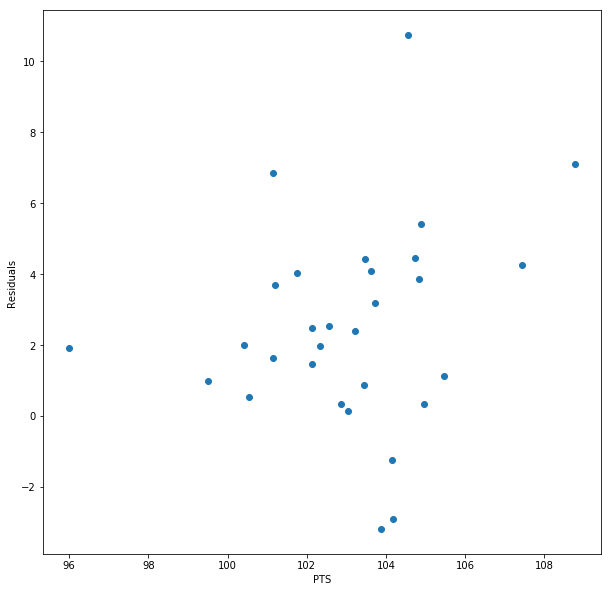

In [217]:
plt.figure(figsize=(10,10))
plt.scatter(result1, residual1)
plt.xlabel('PTS')
plt.ylabel('Residuals')
plt.show()

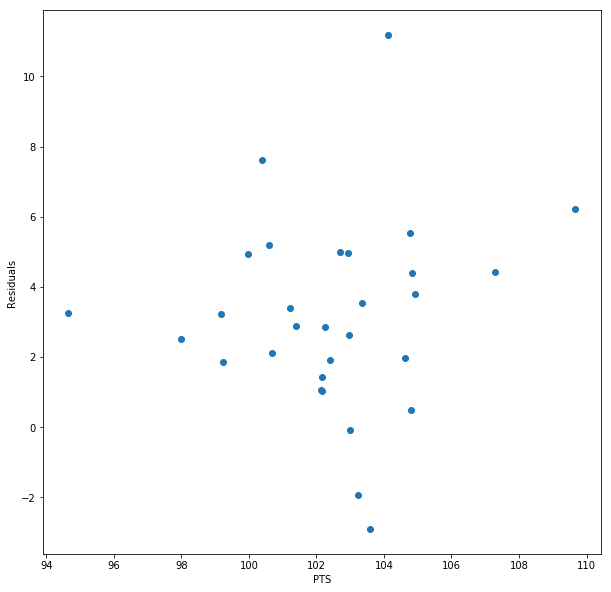

In [218]:
plt.figure(figsize=(10,10))
plt.scatter(result2,residual2)
plt.xlabel('PTS')
plt.ylabel('Residuals')
plt.show()

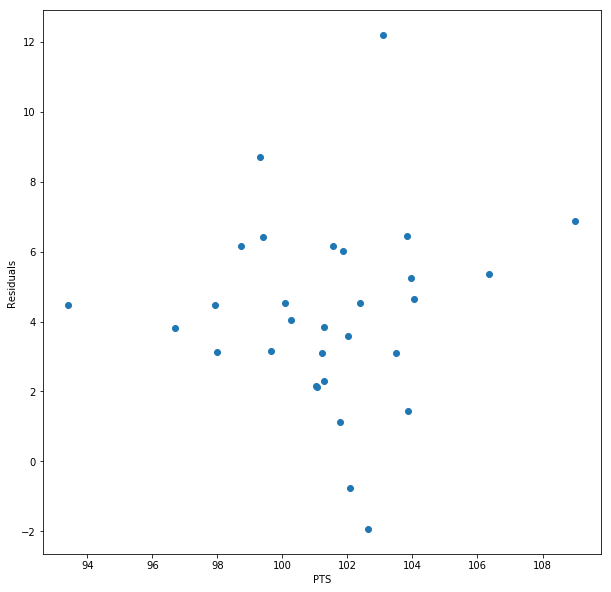

In [207]:
plt.figure(figsize=(10,10))
plt.scatter(result3,residual3)
plt.xlabel('PTS')
plt.ylabel('Residuals')
plt.show()

#### TODO

### Part (e)  For (c), compute the residuals for (i), (ii), and (iii), and plot their distribution. You should have 3 plots. Comment on whether they are Normal. Why does Normality matter?

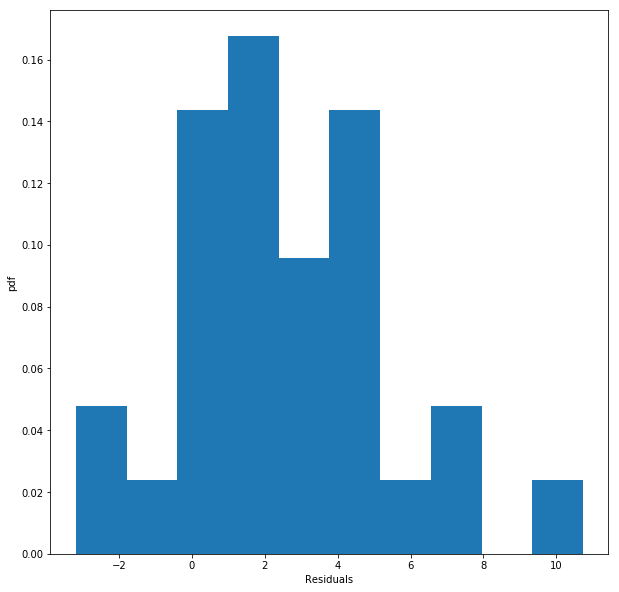

In [209]:
plt.figure(figsize=(10,10))
plt.hist(residual1, density=True)
plt.xlabel('Residuals')
plt.ylabel('pdf')
plt.show()

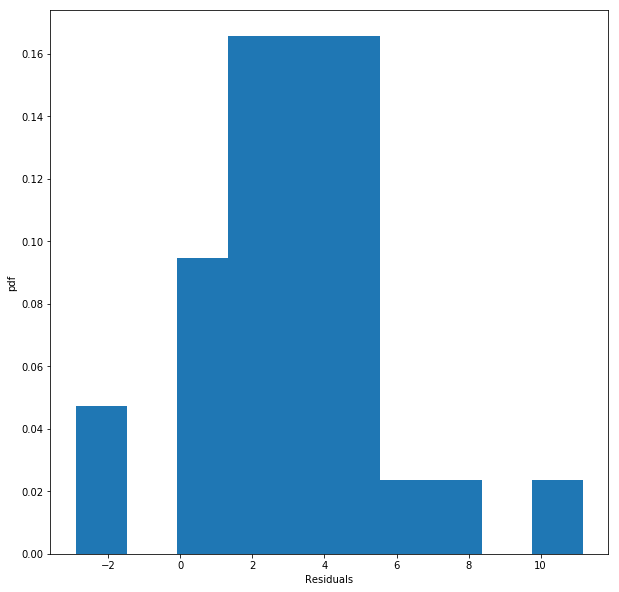

In [210]:
plt.figure(figsize=(10,10))
plt.hist(residual2, density=True)
plt.xlabel('Residuals')
plt.ylabel('pdf')
plt.show()

#### Yes, the plots appear to be normal. Normality is important for residuals. This is because, for non normal residuals, the error is not consistent over the entire data set. This means that the predictive ability is not the same across the full range of the dependent variables. That is, the inference will vary based on the dependent 